# 보스턴 주택가격 예측

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data -= train_data.mean()

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= train_data.std()

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= test_data.mean()
test_data /= test_data.std()

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2)

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model_housing = models.Sequential()
model_housing.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model_housing.add(layers.Dense(256, activation='relu'))
model_housing.add(layers.Dense(1))

model_housing.summary()

model_housing.compile(optimizer='Adam', loss='MSE', metrics=['MAE'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 138,753
Trainable params: 138,753
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model_housing.fit(x_train, y_train, batch_size=100, epochs=50, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 46ms/step - loss: 546.6849 - MAE: 21.5845 - val_loss: 545.0114 - val_MAE: 20.9674
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 468.2986 - MAE: 19.5943 - val_loss: 466.0398 - val_MAE: 18.8872
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 390.0427 - MAE: 17.4490 - val_loss: 374.4732 - val_MAE: 16.2193
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 300.6320 - MAE: 14.6626 - val_loss: 273.7338 - val_MAE: 13.1695
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 206.7018 - MAE: 11.3706 - val_loss: 184.5916 - val_MAE: 10.5139
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 129.8952 - MAE: 8.4547 - val_loss: 138.6079 - val_MAE: 8.8120
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 103.9004 - MAE: 7.6246 - val_loss: 144.7543 - val_MAE: 9.2500
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - l

dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


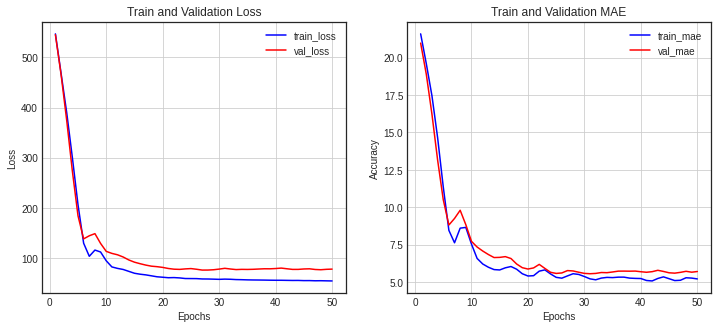

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['MAE']
val_mae = history_dict['val_MAE']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model_housing.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 57.8666 - MAE: 5.5605


[57.86664581298828, 5.56046199798584]

# Reuters 데이터 분류

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f'len before split - train_data: {len(train_data)}, test_data: {len(test_data)}')
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(train_data[0])
print(train_labels[0])
print(val_data[0])
print(val_labels[0])
print(test_data[0])
print(test_labels[0])
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

len before split - train_data: 8982, test_data: 2246
[1, 141, 886, 81, 8, 16, 40, 1087, 1299, 381, 643, 2099, 571, 71, 7, 10, 80, 587, 643, 2099, 42, 3216, 469, 417, 40, 303, 88, 5, 164, 68, 9, 78, 11, 15, 217, 6, 141, 2, 3333, 1891, 11, 150, 303, 88, 10, 176, 13, 141, 886, 8, 17, 12]
4
[1, 141, 234, 2659, 71, 8, 16, 41, 45, 30, 991, 6, 1491, 194, 1777, 2504, 25, 80, 2485, 21, 6068, 13, 69, 425, 5181, 6, 42, 2904, 234, 2659, 1760, 80, 3347, 21, 10, 54, 211, 5, 61, 12, 47, 8, 4, 210, 575, 297, 114, 1491, 4, 497, 41, 45, 30, 554, 457, 713, 17, 12]
1
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9,

In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
cp = callbacks.ModelCheckpoint('reuter.h5', save_best_only=True)
es = callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[cp, es], verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 14ms/step - loss: 2.1161 - accuracy: 0.5284 - val_loss: 2.5929 - val_accuracy: 0.6825
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 1.1926 - accuracy: 0.7187 - val_loss: 1.9385 - val_accuracy: 0.7400
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 0.8947 - accuracy: 0.7880 - val_loss: 1.4636 - val_accuracy: 0.7801
Epoch 4/50
53/53 [==============================] - 0s 6ms/step - loss: 0.7049 - accuracy: 0.8308 - val_loss: 1.1435 - val_accuracy: 0.7970
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.5552 - accuracy: 0.8668 - val_loss: 0.9810 - val_accuracy: 0.8032
Epoch 6/50
53/53 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8885 - val_loss: 0.9019 - val_accuracy: 0.8139
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3743 - accuracy: 0.9086 - val_loss: 0.8846 - val_accuracy: 0.8157
Epoch 8/50
53/53 [=

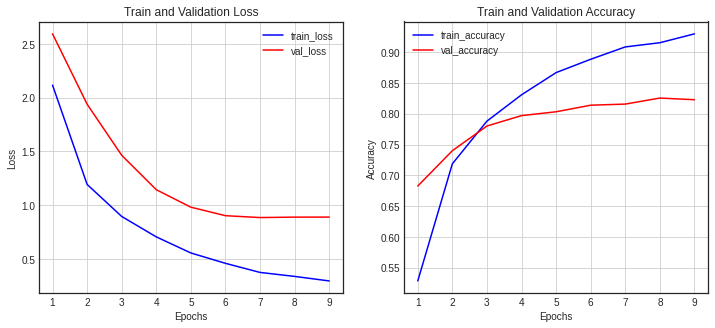

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.8028


[0.9628413915634155, 0.8027604818344116]

# CIFAR10 데이터 분류

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

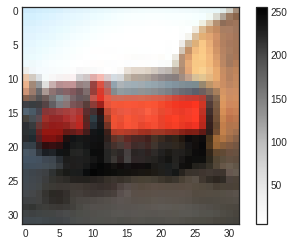

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(3072))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)             

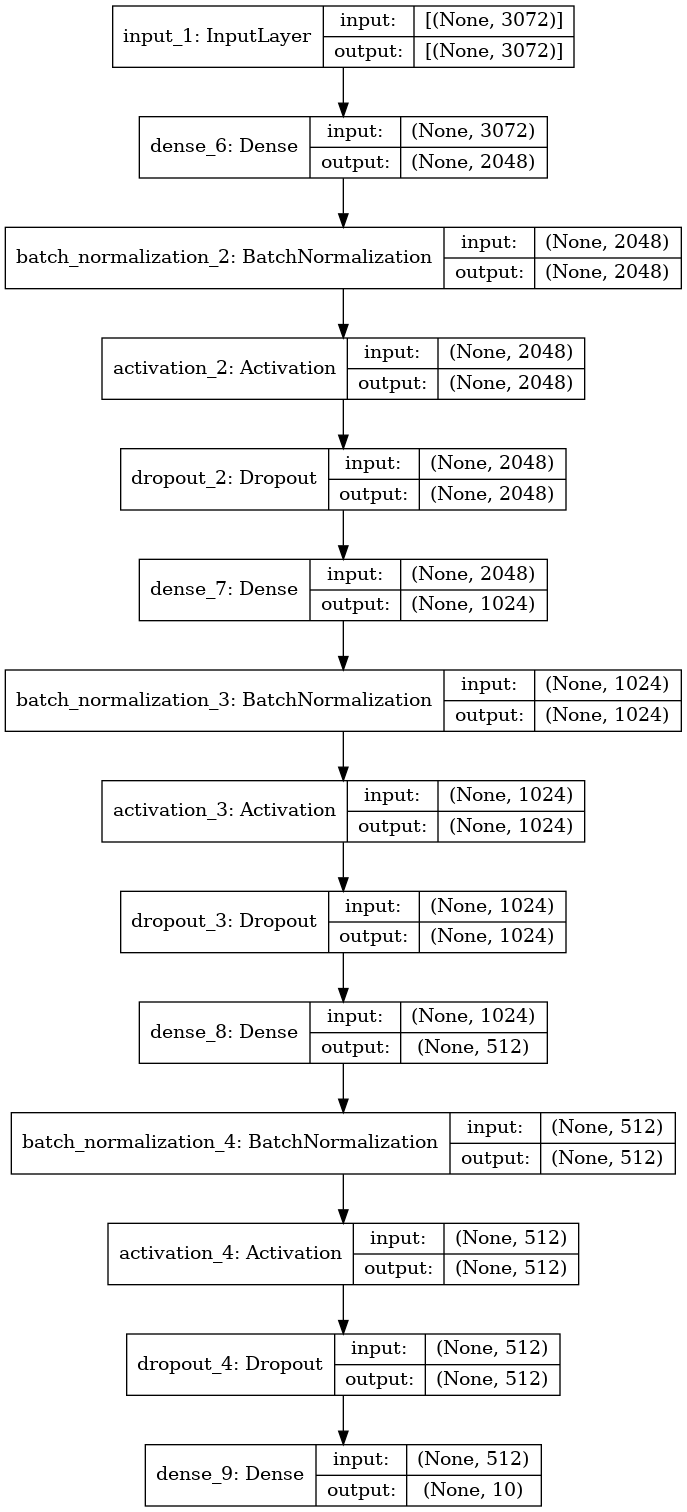

In [25]:
utils.plot_model(model, show_shapes=True)

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
cp = callbacks.ModelCheckpoint('cifar10.h5', save_best_only=True)
es = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, callbacks=[cp, es], validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
400/400 [==============================] - 3s 6ms/step - loss: 1.8985 - accuracy: 0.3403 - val_loss: 2.0087 - val_accuracy: 0.2963
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 1.5954 - accuracy: 0.4308 - val_loss: 1.7472 - val_accuracy: 0.3665
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 1.4799 - accuracy: 0.4713 - val_loss: 1.7027 - val_accuracy: 0.3797
Epoch 4/100
400/400 [==============================] - 2s 5ms/step - loss: 1.4181 - accuracy: 0.4931 - val_loss: 1.7331 - val_accuracy: 0.3945
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 1.3636 - accuracy: 0.5103 - val_loss: 1.6715 - val_accuracy: 0.4160
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 1.3268 - accuracy: 0.5251 - val_loss: 1.6093 - val_accuracy: 0.4184
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 1.2826 - accuracy: 0.5415 - val_loss: 1.7235 - val_accuracy: 0.4022

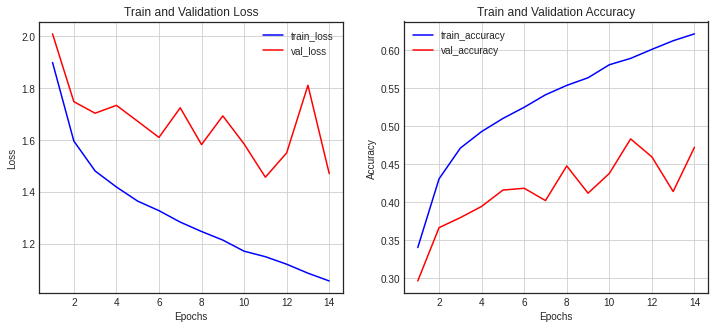

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4721 - accuracy: 0.4782


[1.4721304178237915, 0.4781999886035919]